<div style="text-align: center;">
    <h1>Kaggle Name: Reece Slade</h1>
    <h1>Submissions: 28</h1>
    <h1>Best Public Score: 0.9338</h1>
    <h1>Best Private Score: 0.9103</h1>
</div>

---

<div style="text-align: center;">
    <h1>This notebook follows the CRISP-DM methodology.</h1>
    <p>Each CRISP-DM step is denoted with a number. Content below each number belongs to that step until the next is introduced.</p>
</div>

---

# 1) Business Understanding

### Project Objective
The primary goal of this project is to develop an automated model capable of accurately classifying the sex of an offender based on geometric features derived from their footprints. 

For each print there are 18 landmarks (i.e. x,y-coordinate pairs),which describe the print’s geometry like in the image below

<div style="text-align: center;">
  <img src="../image/footprint.png" alt="Footprint">
</div>


### Business Need
This model addresses a critical need in forensic science: leveraging physical evidence like footprints to infer additional information about a suspect. Traditional analysis of footprints can be time-intensive and relies heavily on expert judgment. Automating the process introduces objectivity, scalability, and efficiency.

### Current Status Quo
Currently, forensic professionals manually analyze footprints or rely on less robust models that may lack accuracy or scalability. This approach is often subjective and may not integrate modern machine-learning techniques, limiting its potential to uncover patterns in large datasets.

### What Are We Trying to Achieve?
- **Improved Accuracy**: Build a model that can reliably classify sex based on geometric footprint features more accurately than foresnic professionals.  
- **Scalability**: Enable the model to process large datasets with minimal human intervention.  
- **Forensic Advancement**: Provide actionable insights for investigators, enhancing the identification process when other evidence (like DNA or visual surveillance) is unavailable.

### Why an Automated Model?
- **Efficiency**: Reduces manual workload and accelerates case analysis.  
- **Consistency**: Eliminates human bias and ensures repeatable outcomes.  
- **Advanced Insights**: Machine learning models can capture subtle patterns in footprint data that are not obvious through manual human inspection.  
- **Broader Application**: The model could extend beyond forensics to fields like biometrics or sports science.  

By integrating data-driven approaches, this project aims to bring precision, speed, and innovation to footprint-based investigations.

---

# Necessary Imports
The cell below imports all necessary libraries for this project. Consolidating imports at the top keeps the notebook organized and reduces redundancy.

---

In [1]:
# Necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Install Required Packages
The cell below installs all required packages to run this notebook in case they are missing.

---

In [ ]:
# Necessary packages
%pip install numpy
%pip install pandas
%pip install matplotlib

# 2) Data Understanding

### Data Source
The training dataset `SexLandmarks-train.csv` includes landmark coordinates from footprints which are represented by coordinates ranging from `x0-x17` and `y0-y17`. These landmarks are accompanied by labels indicating `sex` denoted in binary as `0` or `1` (depending on the sex).

---

### Data Exploration
To better understand the data, the following basic commands and visualizations provide insights into its structure and characteristics.

---

In [2]:
# Load the training dataset
train_data = pd.read_csv('../data/SexLandmarks-train.csv')
train_data

,sex,x0,y0,x1,y1,x2,y2,x3,y3,x4,...,x13,y13,x14,y14,x15,y15,x16,y16,x17,y17
0,0,0.556673,0.064617,0.459606,0.083429,0.395285,0.117782,0.361370,0.157043,0.328624,...,0.495860,0.337807,0.591757,0.297728,0.626842,0.242926,0.591757,0.181581,0.463115,0.180763
1,0,0.601897,0.171537,0.519308,0.152283,0.431714,0.167161,0.391671,0.213546,0.342868,...,0.485522,0.398211,0.603148,0.390334,0.654453,0.339573,0.630678,0.286187,0.473008,0.258181
2,1,0.327504,0.195426,0.437202,0.191268,0.523052,0.216216,0.575517,0.258836,0.610493,...,0.440382,0.474012,0.325914,0.451143,0.238474,0.395010,0.235294,0.322245,0.470588,0.304574
3,1,0.594496,0.111449,0.498477,0.120736,0.458640,0.153599,0.416760,0.191463,0.386116,...,0.550572,0.328631,0.633312,0.310056,0.669063,0.262190,0.645569,0.207895,0.515842,0.202894
4,1,0.616850,0.231525,0.544279,0.222445,0.489851,0.260579,0.450974,0.288725,0.410801,...,0.492443,0.470313,0.577973,0.429456,0.663502,0.400402,0.657023,0.345925,0.522249,0.322319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0.391117,0.032064,0.458453,0.041082,0.507163,0.064128,0.560172,0.106212,0.603152,...,0.439828,0.274549,0.333811,0.236473,0.299427,0.191383,0.322350,0.143287,0.465616,0.136273
1996,0,0.622164,0.125962,0.519250,0.139049,0.463115,0.177492,0.415166,0.210209,0.374234,...,0.559012,0.382793,0.633859,0.343532,0.680638,0.284641,0.653740,0.224114,0.528606,0.206119
1997,1,0.594508,0.160830,0.496128,0.148230,0.443236,0.179358,0.407270,0.209004,0.379766,...,0.485550,0.356493,0.583929,0.355752,0.624127,0.309801,0.616722,0.255697,0.477087,0.227533
1998,0,0.551669,0.219335,0.402226,0.234927,0.316375,0.267152,0.262321,0.325364,0.244833,...,0.456280,0.527027,0.594595,0.496881,0.639110,0.436590,0.597774,0.362786,0.392687,0.362786


In [3]:
train_data.describe()

,sex,x0,y0,x1,y1,x2,y2,x3,y3,x4,...,x13,y13,x14,y14,x15,y15,x16,y16,x17,y17
count,2000.00000,2000.000000,2000.000000,1994.000000,1994.000000,1993.000000,1993.000000,1992.000000,1992.000000,1992.000000,...,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1983.000000,1983.000000
mean,0.55850,0.487538,0.142495,0.488544,0.148220,0.488321,0.177648,0.487826,0.218273,0.486957,...,0.483149,0.407749,0.483490,0.374265,0.481527,0.316086,0.482622,0.257975,0.485124,0.245457
std,0.49669,0.093121,0.059570,0.051502,0.059680,0.094597,0.059735,0.137298,0.059840,0.171293,...,0.048621,0.069833,0.119457,0.066957,0.164397,0.064219,0.140620,0.060773,0.051954,0.059889
min,0.00000,0.175532,0.001002,0.220859,0.001002,0.185583,0.021830,0.159509,0.060291,0.108896,...,0.272347,0.218295,0.127660,0.180361,0.029255,0.129259,0.042553,0.091182,0.279141,0.083166
25%,0.00000,0.410135,0.099982,0.456053,0.106029,0.406938,0.135271,0.363337,0.176715,0.327892,...,0.456981,0.359672,0.377107,0.328315,0.331990,0.271877,0.356151,0.215530,0.451500,0.202468
50%,1.00000,0.486504,0.140632,0.488557,0.146900,0.490798,0.175112,0.521695,0.215431,0.554990,...,0.483680,0.398815,0.461438,0.366944,0.420670,0.309592,0.449387,0.253770,0.484450,0.240473
75%,1.00000,0.567022,0.180361,0.520950,0.188130,0.568368,0.216843,0.611989,0.256513,0.645764,...,0.510376,0.448935,0.591357,0.415155,0.635003,0.356986,0.611963,0.295962,0.520419,0.282791
max,1.00000,0.764706,0.408115,0.731928,0.371102,0.783133,0.412682,0.853916,0.455301,0.920213,...,0.736196,0.643451,0.793323,0.600200,0.861685,0.538462,0.837838,0.476091,0.722892,0.458420


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     2000 non-null   int64  
 1   x0      2000 non-null   float64
 2   y0      2000 non-null   float64
 3   x1      1994 non-null   float64
 4   y1      1994 non-null   float64
 5   x2      1993 non-null   float64
 6   y2      1993 non-null   float64
 7   x3      1992 non-null   float64
 8   y3      1992 non-null   float64
 9   x4      1992 non-null   float64
 10  y4      1992 non-null   float64
 11  x5      1992 non-null   float64
 12  y5      1992 non-null   float64
 13  x6      1992 non-null   float64
 14  y6      1992 non-null   float64
 15  x7      1992 non-null   float64
 16  y7      1992 non-null   float64
 17  x8      1992 non-null   float64
 18  y8      1992 non-null   float64
 19  x9      1991 non-null   float64
 20  y9      1991 non-null   float64
 21  x10     1991 non-null   float64
 22  

In [5]:
# Check for missing values
missing_values = train_data.isna().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 sex     0
x0      0
y0      0
x1      6
y1      6
x2      7
y2      7
x3      8
y3      8
x4      8
y4      8
x5      8
y5      8
x6      8
y6      8
x7      8
y7      8
x8      8
y8      8
x9      9
y9      9
x10     9
y10     9
x11     9
y11     9
x12     9
y12     9
x13     9
y13     9
x14     9
y14     9
x15     9
y15     9
x16     9
y16     9
x17    17
y17    17
dtype: int64


### This data exploration gives us information about the dataset we are using, such as null values, data types and basic statistics.

---

### Feature Engineering

Based on the information derived from the basic statistics, I decided to add some feature engineering to identify any potential outliers.

The dataset's landmark coordinates are normalized (scaled between 0 and 1). To compute actual distances:
- **Scaling Back to Pixel Dimensions**: Multiply x-coordinates by 2240 and y-coordinates by 3200 to align with the original image dimensions. 
- This correction ensures that calculated lengths and widths represent true distances, improving model performance and potentially increasing AUC scores.

In [32]:
# Calculate lengths and widths based on landmarks
w, h = 2240, 3200
euclidean_lengths = np.sqrt((train_data['x1'] * w - train_data['x9'] * w) ** 2 + (train_data['y1'] * h - train_data['y9'] * h) ** 2)
euclidean_widths = np.sqrt((train_data['x5'] * w - train_data['x15'] * w) ** 2 + (train_data['y5'] * h - train_data['y15'] * h) ** 2)

# Add new features to the DataFrame
train_data['euclidean_lengths'] = euclidean_lengths
train_data['euclidean_widths'] = euclidean_widths

This code was previously taken from one of **Marcin Budkas** labs where he demonstrated how to conduct `feature engineering`. Feature engineering is the process of using domain knowledge to select and transform the most relevant variables from a dataset when creating a predictive model using machine learning or statistical modeling. As demonstrated by the code above, this was achieved by calculating the euclidean distance to create a widths and lengths feature.

### Outlier Handling
Using z-score and threshholds I was able to better understand the data as I identified and analyzed potential outliers:
- Plotted distributions of key features (e.g., length and width).
- Dropped clear outliers and evaluated their impact on model performance.
- Visualized shapes by connecting landmark points for both outliers and random samples to assess differences.

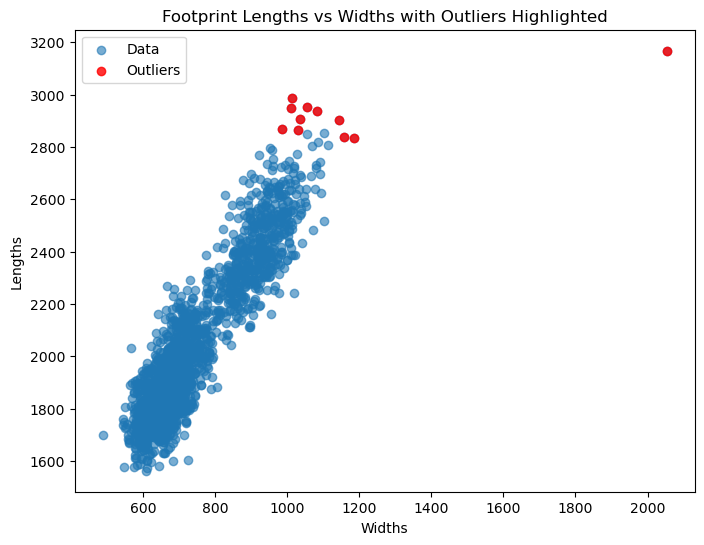

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate z-scores for lengths and widths to identify outliers
z_lengths = np.abs((train_data['euclidean_lengths'] - train_data['euclidean_lengths'].mean()) / train_data['euclidean_lengths'].std())
z_widths = np.abs((train_data['euclidean_widths'] - train_data['euclidean_widths'].mean()) / train_data['euclidean_widths'].std())

# Define a threshold for outliers
threshold = 3
outliers = (z_lengths > threshold) | (z_widths > threshold)

outliers_df = train_data[outliers]

outliers_df

# Plot the original data
plt.figure(figsize=(8, 6))
plt.scatter(train_data['euclidean_widths'], train_data['euclidean_lengths'], label='Data', alpha=0.6)

# Plot the outliers in a different color
plt.scatter(outliers_df['euclidean_widths'], outliers_df['euclidean_lengths'], color='red', label='Outliers', alpha=0.8)

plt.title('Footprint Lengths vs Widths with Outliers Highlighted')
plt.xlabel('Widths')
plt.ylabel('Lengths')
plt.legend()
plt.show()

To further my understanding of the data, I wanted to plot all of the outliers in a foot like shape to determine whether or not these footprints are outiers or not.

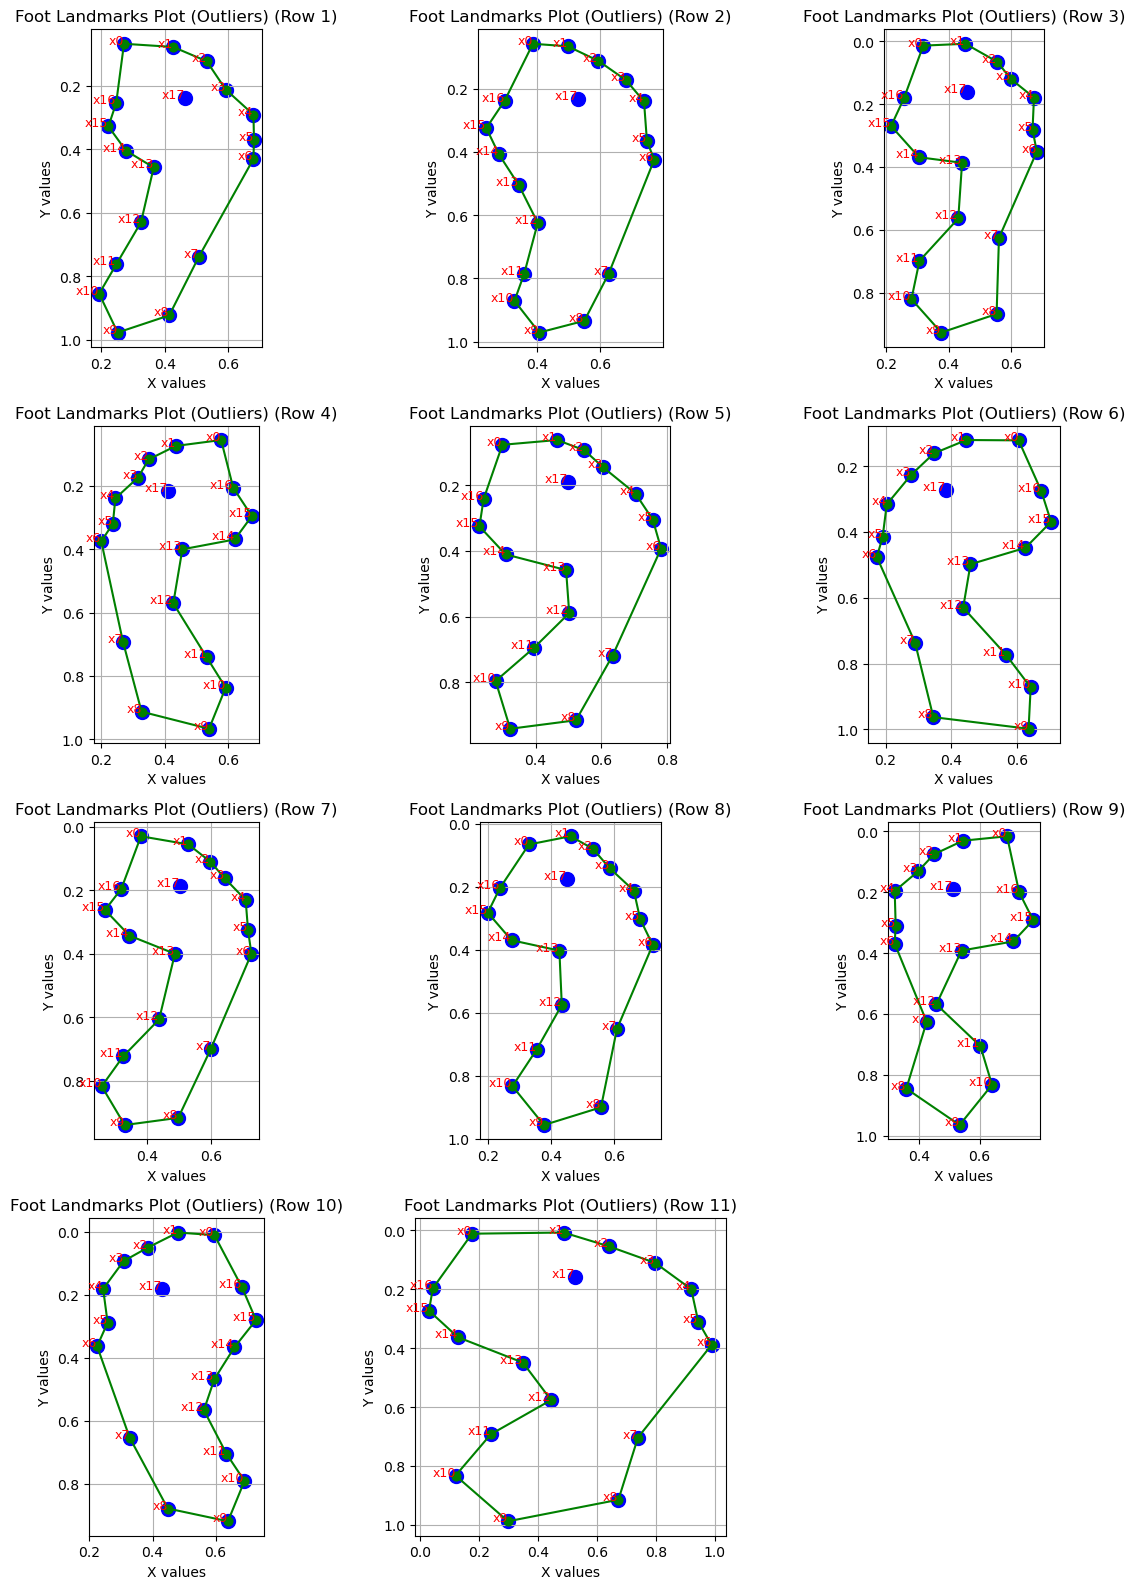

In [49]:
import matplotlib.pyplot as plt
import numpy as np

def plot_landmarks(data, start_idx, num_rows, title_prefix):
    """
    Plot foot landmarks for a specified range of rows in the dataset.

    Parameters:
    - data: The dataset containing the landmark data.
    - start_idx: The starting index for the rows to plot.
    - num_rows: The number of rows to plot.
    - title_prefix: The prefix for the title of the plots.
    """
    # Define number of columns for the subplots
    num_cols = 3  # Adjust as needed
    num_rows_plots = int(np.ceil(num_rows / num_cols))  # Calculate the number of rows needed for the subplots
    
    plt.figure(figsize=(12, 4 * num_rows_plots))  # Adjust height based on number of rows

    # Define the order of landmark connections excluding 17
    connection_order = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 0]  # Excluding 17

    # Loop through the specified rows of the dataset
    for row_idx in range(num_rows):
        # Select the current row of x and y columns
        current_row = data.iloc[start_idx + row_idx]

        # Extract x and y values for the current row
        x_values = [current_row[f'x{i}'] for i in range(18)]
        y_values = [current_row[f'y{i}'] for i in range(18)]

        # Create a subplot for each row
        plt.subplot(num_rows_plots, num_cols, row_idx + 1)

        # Plot scatter points
        plt.scatter(x_values, y_values, color='blue', label='Landmarks', s=100)

        # Plot lines according to the specified connection order, excluding point 17
        for i in range(len(connection_order) - 1):
            plt.plot([x_values[connection_order[i]], x_values[connection_order[i + 1]]],
                     [y_values[connection_order[i]], y_values[connection_order[i + 1]]],
                     color='green', linestyle='-', marker='o')

        # Invert the y-axis to match the image orientation
        plt.gca().invert_yaxis()

        # Add labels and title for the subplot
        plt.xlabel('X values')
        plt.ylabel('Y values')
        plt.title(f'{title_prefix} (Row {row_idx + 1})')
        plt.grid(True)

        # Annotate each point with its corresponding landmark label
        for i in range(18):
            plt.text(x_values[i], y_values[i], f'x{i}', fontsize=9, ha='right', color='red')

        # Adjust the aspect ratio for each subplot
        plt.gca().set_aspect('equal', adjustable='box')

    # Show the plot with all subplots
    plt.tight_layout()
    plt.show()

    # Print the coordinates for each landmark after the plots
    for row_idx in range(num_rows):
        current_row = data.iloc[start_idx + row_idx]
        x_values = [current_row[f'x{i}'] for i in range(18)]
        y_values = [current_row[f'y{i}'] for i in range(18)]

# Plot for the outliers
plot_landmarks(outliers_df, 0, len(outliers_df), 'Foot Landmarks Plot (Outliers)')

Based on the visualisation of the footprints the only clear outlier to me would be `Row 11` as this footpint is huge! 

Later, when I decided to drop all outliers from the `X_train_imputed` dataframe, I observed a decrease in my model's ROC accuracy (the metric used in Kaggle). As a result, I chose to retain the outliers in the dataset.

---

# 3) Data Preparation and Modelling

### Missing Value Handling  
The dataset contains some missing values which can cause issues moving forward, such as:  
- Certain predictive models being unable to process data with null values.  
- A potential decrease in overall model accuracy.

To address this, the following approach was used:

- **KNN Imputation**: Chosen over simpler methods like mean substitution, as it provides more accurate estimations by leveraging similarities between data points. This method uses the \(k\)-nearest neighbors of a data point to predict missing values.
  
- **Optimization of Parameters**: Various values for `n_neighbors` were experimented with, and it was determined that `n_neighbors=9` yielded the best performance.

In [50]:
from sklearn.impute import KNNImputer

def load_and_impute():
    # Load the training dataset
    train_data = pd.read_csv('../data/SexLandmarks-train.csv')
    
    # Apply KNN Imputer
    imputer = KNNImputer(n_neighbors=9)
    
    # Separate features (X_train) from target ('sex')
    X_train = train_data.drop('sex', axis=1)
    
    # Impute missing values in X_train
    X_train_imputed = imputer.fit_transform(X_train)
    
    # Convert the imputed data back to a DataFrame with the original columns
    X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)
    
    # Return imputed training data and the imputer
    return X_train_imputed, imputer

The function above uses KNN imputation to handle missing values. It also drops the target variable `sex` from the feature set. This is **important** because the goal of the model is to predict the target, and including it in the training data would allow the model to `memorize` the target values, leading to data leakage and overfitting. By removing the target, we ensure that the model learns patterns solely from the input features, improving its generalization to `unseen data`. The reason I refactored it into a function is so I can apply this to my holdout dataframe when I submit to kaggle later

In [51]:
# Call function
X_train_imputed, imputer = load_and_impute()

### Missing Value Visualization
A visual representation shows the dataset before and after missing value imputation.

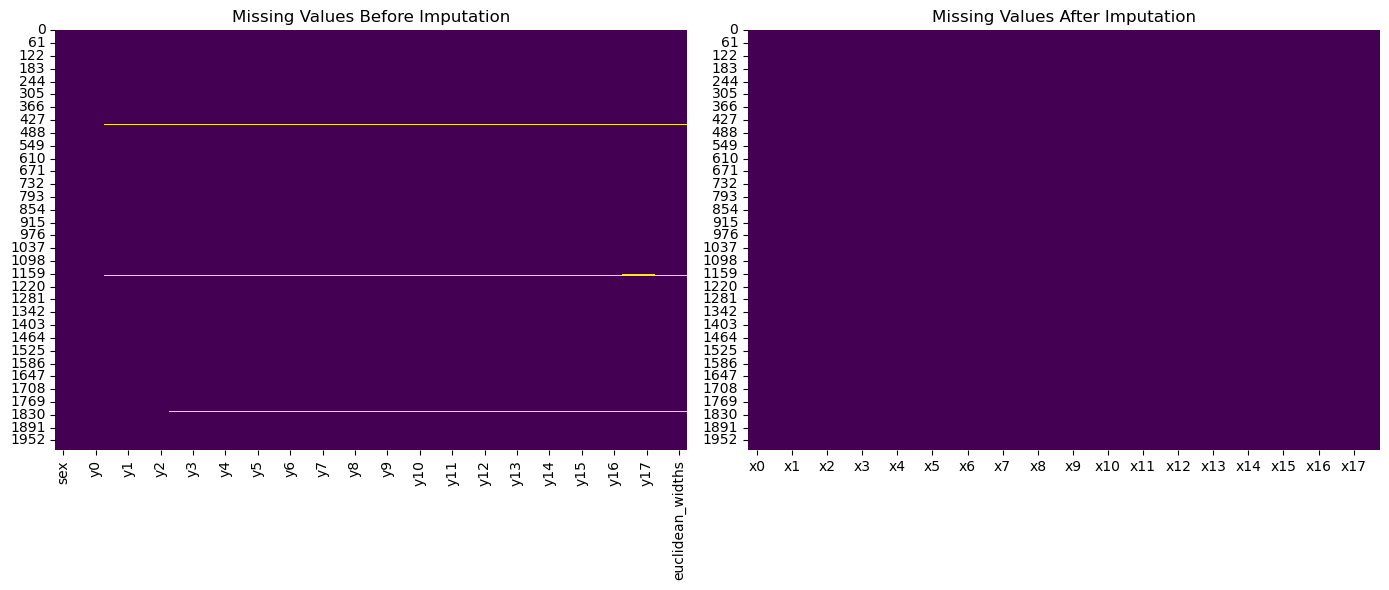

In [52]:
# Create side-by-side heatmaps
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Heatmap before imputation
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis', ax=axs[0])
axs[0].set_title('Missing Values Before Imputation')

# Heatmap after imputation
sns.heatmap(X_train_imputed.isnull(), cbar=False, cmap='viridis', ax=axs[1])
axs[1].set_title('Missing Values After Imputation')

# Adjust layout
plt.tight_layout()
plt.show()

---

Due to **Marcins** demonstration of feature engineering as shown in `2) Data Understanding`, I decided to create a rich variety of features by prompting `ChatGPT`. This consisted of me continually asking it to provide me with additional features based on the given dataset. I decided to include this wide range of features because later I planned on removing unimportant features by using `featrure selection`. 

Below is the function I used to add all of these features to my existing dataframe

---

In [53]:
from scipy.spatial import ConvexHull
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

def create_df(X_train_imputed):
    # Calculate lengths and widths based on landmarks
    w, h = 2240, 3200
    euclidean_lengths = np.sqrt((X_train_imputed['x1'] * w - X_train_imputed['x9'] * w) ** 2 + (X_train_imputed['y1'] * h - X_train_imputed['y9'] * h) ** 2)
    euclidean_widths = np.sqrt((X_train_imputed['x5'] * w - X_train_imputed['x15'] * w) ** 2 + (X_train_imputed['y5'] * h - X_train_imputed['y15'] * h) ** 2)

    # Add new features to the DataFrame
    X_train_imputed['euclidean_lengths'] = euclidean_lengths
    X_train_imputed['euclidean_widths'] = euclidean_widths

    # Calculate lengths and widths based on landmarks using Manhattan distance
    manhattan_lengths = np.abs(X_train_imputed['x1'] * w - X_train_imputed['x9'] * w) + np.abs(X_train_imputed['y1'] * h - X_train_imputed['y9'] * h)
    manhattan_widths = np.abs(X_train_imputed['x5'] * w - X_train_imputed['x15'] * w) + np.abs(X_train_imputed['y5'] * h - X_train_imputed['y15'] * h)

    # Add new features to the DataFrame
    X_train_imputed['manhattan_lengths'] = manhattan_lengths
    X_train_imputed['manhattan_widths'] = manhattan_widths

    # Calculate products, ratios, and differences for Euclidean and Manhattan distances
    # Products

    X_train_imputed['euclidean_area'] = X_train_imputed['euclidean_lengths'] * X_train_imputed['euclidean_widths']
    X_train_imputed['manhattan_area'] = X_train_imputed['manhattan_lengths'] * X_train_imputed['manhattan_widths']

    # Shoelace formula for area calculation based on 36 coordinates (landmarks)
    X_train_imputed['footprint_area'] = 0.5 * np.abs(
        (X_train_imputed.filter(like='x') * np.roll(X_train_imputed.filter(like='y'), 1, axis=1)).sum(axis=1)
        - (X_train_imputed.filter(like='y') * np.roll(X_train_imputed.filter(like='x'), 1, axis=1)).sum(axis=1)
    )


    # Extract x and y coordinates for the top part (points 0 to 13)
    x_top = X_train_imputed[['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13']].values
    y_top = X_train_imputed[['y0', 'y1', 'y2', 'y3', 'y4', 'y5', 'y6', 'y7', 'y8', 'y9', 'y10', 'y11', 'y12', 'y13']].values

    # Apply the shoelace formula to calculate the area of the top part
    top_area = 0.5 * np.abs(
        np.sum(x_top * np.roll(y_top, shift=1, axis=1), axis=1) -
        np.sum(y_top * np.roll(x_top, shift=1, axis=1), axis=1)
    )

    # Add the top part area as a new column to the dataframe
    X_train_imputed['top_footprint_area'] = top_area

    # Extract x and y coordinates for points 0 to 5 and point 13
    x_circular = X_train_imputed[['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x13']].values
    y_circular = X_train_imputed[['y0', 'y1', 'y2', 'y3', 'y4', 'y5', 'y13']].values

    # Apply the shoelace formula to calculate the area for the top circular part
    circular_area = 0.5 * np.abs(
        np.sum(x_circular * np.roll(y_circular, shift=1, axis=1), axis=1) -
        np.sum(y_circular * np.roll(x_circular, shift=1, axis=1), axis=1)
    )

    # Add the circular part area as a new column to the dataframe
    X_train_imputed['circular_footprint_area'] = circular_area


    # Function to calculate the centroid of a set of points
    def calculate_centroid(x, y):
        centroid_x = np.mean(x)
        centroid_y = np.mean(y)
        return centroid_x, centroid_y

    # Calculate the centroid for the circular points
    centroid_x, centroid_y = calculate_centroid(x_circular.flatten(), y_circular.flatten())

    # Calculate the radius for each point in the circular shape
    radius = np.sqrt((x_circular - centroid_x)**2 + (y_circular - centroid_y)**2)

    # Calculate the average radius
    average_radius = np.mean(radius)

    # Calculate the circumference
    circumference = 2 * np.pi * average_radius

    # Add the average radius and circumference to the dataframe
    X_train_imputed['average_radius'] = average_radius
    X_train_imputed['circular_circumference'] = circumference



    # Ratios
    X_train_imputed['euclidean_ratio'] = X_train_imputed['euclidean_lengths'] / (X_train_imputed['euclidean_widths'] + 1e-5)  # Add small value to avoid division by zero
    X_train_imputed['manhattan_ratio'] = X_train_imputed['manhattan_lengths'] / (X_train_imputed['manhattan_widths'] + 1e-5)

    # Differences
    X_train_imputed['euclidean_difference'] = X_train_imputed['euclidean_lengths'] - X_train_imputed['euclidean_widths']
    X_train_imputed['manhattan_difference'] = X_train_imputed['manhattan_lengths'] - X_train_imputed['manhattan_widths']

    # Combined Euclidean-Manhattan measures
    # Differences between Euclidean and Manhattan measures
    X_train_imputed['length_diff_euclidean_manhattan'] = X_train_imputed['euclidean_lengths'] - X_train_imputed['manhattan_lengths']
    X_train_imputed['width_diff_euclidean_manhattan'] = X_train_imputed['euclidean_widths'] - X_train_imputed['manhattan_widths']

    # Sum of lengths and widths (Euclidean and Manhattan)
    X_train_imputed['euclidean_sum'] = X_train_imputed['euclidean_lengths'] + X_train_imputed['euclidean_widths']
    X_train_imputed['manhattan_sum'] = X_train_imputed['manhattan_lengths'] + X_train_imputed['manhattan_widths']


    ###################

    X_train_imputed['euclidean_aspect_ratio'] = X_train_imputed['euclidean_lengths'] / (X_train_imputed['euclidean_widths'] + 1e-5)
    X_train_imputed['manhattan_aspect_ratio'] = X_train_imputed['manhattan_lengths'] / (X_train_imputed['manhattan_widths'] + 1e-5)
    # Calculate perimeter using distances between consecutive points
    perimeter = np.sum(np.sqrt(np.diff(X_train_imputed.filter(like='x'), axis=1)**2 + np.diff(X_train_imputed.filter(like='y'), axis=1)**2), axis=1)
    X_train_imputed['footprint_perimeter'] = perimeter

    X_train_imputed['compactness'] = X_train_imputed['footprint_area'] / (X_train_imputed['footprint_perimeter'] ** 2 + 1e-5)
    X_train_imputed['bounding_box_width'] = X_train_imputed.filter(like='x').max(axis=1) - X_train_imputed.filter(like='x').min(axis=1)
    X_train_imputed['bounding_box_height'] = X_train_imputed.filter(like='y').max(axis=1) - X_train_imputed.filter(like='y').min(axis=1)
    X_train_imputed['euclidean_geometric_mean'] = np.sqrt(X_train_imputed['euclidean_lengths'] * X_train_imputed['euclidean_widths'])
    X_train_imputed['manhattan_geometric_mean'] = np.sqrt(X_train_imputed['manhattan_lengths'] * X_train_imputed['manhattan_widths'])

    hull = ConvexHull(X_train_imputed[['x0', 'y0']].values)
    X_train_imputed['convex_hull_area'] = hull.volume  # volume will give you the area in 2D
    distances_from_centroid = np.sqrt((X_train_imputed.filter(like='x') - centroid_x) ** 2 + (X_train_imputed.filter(like='y') - centroid_y) ** 2)
    X_train_imputed['circular_to_footprint_area_ratio'] = X_train_imputed['circular_footprint_area'] / (X_train_imputed['footprint_area'] + 1e-5)

    # New Features
    X_train_imputed['euclidean_width_to_length_ratio'] = X_train_imputed['euclidean_widths'] / (X_train_imputed['euclidean_lengths'] + 1e-5)
    X_train_imputed['manhattan_width_to_length_ratio'] = X_train_imputed['manhattan_widths'] / (X_train_imputed['manhattan_lengths'] + 1e-5)

    # Differences between areas
    X_train_imputed['area_difference'] = X_train_imputed['euclidean_area'] - X_train_imputed['manhattan_area']

    # Additional circular measurements
    X_train_imputed['circular_area_to_footprint_area_ratio'] = X_train_imputed['circular_footprint_area'] / (X_train_imputed['footprint_area'] + 1e-5)

    # Compactness ratio based on average radius
    X_train_imputed['compactness_ratio'] = X_train_imputed['footprint_area'] / (np.pi * (X_train_imputed['average_radius'] ** 2 + 1e-5))

    # Calculate eccentricity based on bounding box
    X_train_imputed['eccentricity'] = np.sqrt(X_train_imputed['bounding_box_width'] ** 2 + X_train_imputed['bounding_box_height'] ** 2) / (X_train_imputed['footprint_perimeter'] + 1e-5)

    # Area ratios
    X_train_imputed['top_area_to_total_area_ratio'] = X_train_imputed['top_footprint_area'] / (X_train_imputed['footprint_area'] + 1e-5)

    # More New Features

    # Aspect ratio based on bounding box dimensions
    X_train_imputed['bounding_box_aspect_ratio'] = X_train_imputed['bounding_box_width'] / (X_train_imputed['bounding_box_height'] + 1e-5)

    # Perimeter-to-area ratio
    X_train_imputed['perimeter_to_area_ratio'] = X_train_imputed['footprint_perimeter'] / (X_train_imputed['footprint_area'] + 1e-5)

    # Calculate the convex hull perimeter

    hull = ConvexHull(X_train_imputed[['x0', 'y0']].values)
    X_train_imputed['convex_hull_perimeter'] = np.sum(np.sqrt(np.sum(np.diff(X_train_imputed[['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13']], axis=1)**2, axis=1)))

    # Circularity: ratio of area to convex hull area
    X_train_imputed['circularity'] = X_train_imputed['footprint_area'] / (X_train_imputed['convex_hull_area'] + 1e-5)

    # Symmetry measurement based on distances from centroid
    X_train_imputed['symmetry'] = np.mean(distances_from_centroid) / (X_train_imputed['footprint_perimeter'] + 1e-5)

    # Centroid distances from bounding box corners
    corners_x = np.array([X_train_imputed['bounding_box_width'].min(), X_train_imputed['bounding_box_width'].max()])
    corners_y = np.array([X_train_imputed['bounding_box_height'].min(), X_train_imputed['bounding_box_height'].max()])
    X_train_imputed['centroid_distance_from_corners'] = np.mean(np.sqrt((corners_x - centroid_x)**2 + (corners_y - centroid_y)**2))

    # Calculate the distance between the centroid and the footprint perimeter
    X_train_imputed['centroid_to_perimeter_distance'] = np.sqrt(np.sum((X_train_imputed.filter(like='x').mean(axis=1) - centroid_x)**2 + (X_train_imputed.filter(like='y').mean(axis=1) - centroid_y)**2))

    # Ratio of average radius to bounding box dimensions
    X_train_imputed['average_radius_to_bounding_box_ratio'] = X_train_imputed['average_radius'] / (X_train_imputed['bounding_box_width'] + X_train_imputed['bounding_box_height'] + 1e-5)

    # Additional Features

    # Ratio of circular area to footprint area
    X_train_imputed['circular_area_ratio'] = X_train_imputed['circular_footprint_area'] / (X_train_imputed['footprint_area'] + 1e-5)

    # Calculate the solidity (area of footprint divided by area of convex hull)
    X_train_imputed['solidity'] = X_train_imputed['footprint_area'] / (X_train_imputed['convex_hull_area'] + 1e-5)

    # Eccentricity based on the lengths of bounding box
    X_train_imputed['eccentricity_bounding_box'] = np.sqrt(1 - (X_train_imputed['bounding_box_height'] / X_train_imputed['bounding_box_width']) ** 2)

    # Calculate the density of the footprint (area divided by perimeter)
    X_train_imputed['footprint_density'] = X_train_imputed['footprint_area'] / (X_train_imputed['footprint_perimeter'] + 1e-5)

    # Measure of irregularity based on the difference between the area and bounding box area
    X_train_imputed['irregularity'] = (X_train_imputed['bounding_box_width'] * X_train_imputed['bounding_box_height']) - X_train_imputed['footprint_area']

    # Calculate the distance from the centroid to each corner of the bounding box

    # Calculate the aspect ratio of the footprint using area
    X_train_imputed['area_aspect_ratio'] = X_train_imputed['footprint_area'] / (X_train_imputed['footprint_perimeter'] ** 2 + 1e-5)

    # Ratio of total lengths of all segments to the area (indicative of complexity)
    X_train_imputed['complexity_ratio'] = X_train_imputed['footprint_perimeter'] / (X_train_imputed['footprint_area'] + 1e-5)

    # Calculate the mean distance from centroid to all points
    mean_distances = np.mean(np.sqrt((X_train_imputed.filter(like='x') - centroid_x) ** 2 + (X_train_imputed.filter(like='y') - centroid_y) ** 2), axis=1)
    X_train_imputed['mean_distance_to_centroid'] = mean_distances

    # Ratio of average distance to bounding box width and height
    X_train_imputed['avg_distance_to_bounding_box_ratio'] = mean_distances / (X_train_imputed['bounding_box_width'] + X_train_imputed['bounding_box_height'] + 1e-5)

    # Additional Features

    # Calculate the footprint's area-to-perimeter ratio
    X_train_imputed['area_perimeter_ratio'] = X_train_imputed['footprint_area'] / (X_train_imputed['footprint_perimeter'] + 1e-5)

    # Calculate the perimeter-to-average radius ratio
    X_train_imputed['perimeter_to_avg_radius_ratio'] = X_train_imputed['footprint_perimeter'] / (X_train_imputed['average_radius'] + 1e-5)

    # Calculate the maximum distance from centroid to any point
    X_train_imputed['max_distance_to_centroid'] = np.max(np.sqrt((X_train_imputed.filter(like='x') - centroid_x) ** 2 + (X_train_imputed.filter(like='y') - centroid_y) ** 2), axis=1)

    # Calculate the minimum distance from centroid to any point
    X_train_imputed['min_distance_to_centroid'] = np.min(np.sqrt((X_train_imputed.filter(like='x') - centroid_x) ** 2 + (X_train_imputed.filter(like='y') - centroid_y) ** 2), axis=1)

    # Calculate the average distance from centroid to all points

    # Ratio of the average radius to the maximum radius
    X_train_imputed['avg_to_max_radius_ratio'] = X_train_imputed['average_radius'] / (np.max(radius) + 1e-5)

    # Calculate the footprint's orientation using principal component analysis

    pca = PCA(n_components=2)
    pca.fit(X_train_imputed[['x0', 'y0', 'x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'x5', 'y5', 'x6', 'y6', 'x7', 'y7', 'x8', 'y8', 'x9', 'y9', 'x10', 'y10', 'x11', 'y11', 'x12', 'y12', 'x13', 'y13']].values)
    X_train_imputed['orientation'] = np.arctan2(pca.components_[1, 0], pca.components_[0, 0])

    # Measure of compactness based on area and perimeter
    X_train_imputed['compactness_index'] = (4 * np.pi * X_train_imputed['footprint_area']) / (X_train_imputed['footprint_perimeter'] ** 2 + 1e-5)

    # Calculate the average width based on bounding box dimensions
    X_train_imputed['average_width'] = (X_train_imputed['bounding_box_width'] + X_train_imputed['bounding_box_height']) / 2

    # Calculate the ratio of average width to footprint area
    X_train_imputed['width_to_area_ratio'] = X_train_imputed['average_width'] / (X_train_imputed['footprint_area'] + 1e-5)

    # Calculate the sum of all distances from the centroid
    X_train_imputed['total_distance_to_centroid'] = np.sum(np.sqrt((X_train_imputed.filter(like='x') - centroid_x) ** 2 + (X_train_imputed.filter(like='y') - centroid_y) ** 2), axis=1)

    # Additional features for the imputed DataFrame

    # Pairwise distances between some landmarks
    X_train_imputed['distance_x1_x2'] = np.sqrt((X_train_imputed['x1'] - X_train_imputed['x2']) ** 2 + 
                                                (X_train_imputed['y1'] - X_train_imputed['y2']) ** 2)
    X_train_imputed['distance_x3_x4'] = np.sqrt((X_train_imputed['x3'] - X_train_imputed['x4']) ** 2 + 
                                                (X_train_imputed['y3'] - X_train_imputed['y4']) ** 2)

    # Ratios of distances
    X_train_imputed['ratio_x1_x2_x3_x4'] = X_train_imputed['distance_x1_x2'] / (X_train_imputed['distance_x3_x4'] + 1e-5)

    # Products of selected distances
    X_train_imputed['product_x1_x2_x3_x4'] = X_train_imputed['distance_x1_x2'] * X_train_imputed['distance_x3_x4']

    # Differences between selected x and y coordinates
    X_train_imputed['diff_x1_x2'] = X_train_imputed['x1'] - X_train_imputed['x2']
    X_train_imputed['diff_y1_y2'] = X_train_imputed['y1'] - X_train_imputed['y2']

    # Additional feature ideas

    # Distances between more pairs of landmarks
    X_train_imputed['distance_x5_x6'] = np.sqrt((X_train_imputed['x5'] - X_train_imputed['x6']) ** 2 + 
                                                (X_train_imputed['y5'] - X_train_imputed['y6']) ** 2)
    X_train_imputed['distance_x7_x8'] = np.sqrt((X_train_imputed['x7'] - X_train_imputed['x8']) ** 2 + 
                                                (X_train_imputed['y7'] - X_train_imputed['y8']) ** 2)

    # Ratios of distances between landmarks
    X_train_imputed['ratio_x5_x6_x7_x8'] = X_train_imputed['distance_x5_x6'] / (X_train_imputed['distance_x7_x8'] + 1e-5)

    # Angle-related features (angle between 3 landmarks - using arctangent)
    X_train_imputed['angle_x1_x2_x3'] = np.arctan2(X_train_imputed['y3'] - X_train_imputed['y2'], 
                                                X_train_imputed['x3'] - X_train_imputed['x2']) - \
                                        np.arctan2(X_train_imputed['y1'] - X_train_imputed['y2'], 
                                                X_train_imputed['x1'] - X_train_imputed['x2'])

    # Ratios between x and y coordinates for each pair of landmarks
    X_train_imputed['ratio_x1_y1'] = X_train_imputed['x1'] / (X_train_imputed['y1'] + 1e-5)
    X_train_imputed['ratio_x2_y2'] = X_train_imputed['x2'] / (X_train_imputed['y2'] + 1e-5)

    # Length of lines connecting key landmarks (example: from x1 to x4)
    X_train_imputed['length_x1_x4'] = np.sqrt((X_train_imputed['x1'] - X_train_imputed['x4']) ** 2 + 
                                            (X_train_imputed['y1'] - X_train_imputed['y4']) ** 2)

    # Diagonal distances (cross-distance between landmark pairs)
    X_train_imputed['distance_x1_x8'] = np.sqrt((X_train_imputed['x1'] - X_train_imputed['x8']) ** 2 + 
                                                (X_train_imputed['y1'] - X_train_imputed['y8']) ** 2)

    # Symmetry-based features (difference in distances between opposite sides)
    X_train_imputed['symmetry_x1_x2_x7_x8'] = np.abs(X_train_imputed['distance_x1_x2'] - X_train_imputed['distance_x7_x8'])

    # Center of mass coordinates (average of x and y coordinates of specific landmarks)
    X_train_imputed['center_x'] = (X_train_imputed['x1'] + X_train_imputed['x2'] + X_train_imputed['x3'] + X_train_imputed['x4']) / 4
    X_train_imputed['center_y'] = (X_train_imputed['y1'] + X_train_imputed['y2'] + X_train_imputed['y3'] + X_train_imputed['y4']) / 4

    # Aspect ratio (width to length ratio, if dimensions are available)
    X_train_imputed['aspect_ratio'] = X_train_imputed['euclidean_lengths'] / (X_train_imputed['euclidean_widths'] + 1e-5)

    # Curvature-related feature (example using x1 to x5 as part of an arc)
    X_train_imputed['curvature_x1_x5'] = np.abs((X_train_imputed['x1'] - X_train_imputed['x5']) /
                                                (X_train_imputed['y1'] - X_train_imputed['y5'] + 1e-5))


    # Trigonometric features for capturing angle differences
    X_train_imputed['cos_angle'] = np.cos(X_train_imputed['angle_x1_x2_x3'])
    X_train_imputed['sin_angle'] = np.sin(X_train_imputed['angle_x1_x2_x3'])

    # Area-based features (e.g., area enclosed by the first four landmarks, if it forms a polygon)
    X_train_imputed['area_x1_x2_x3_x4'] = 0.5 * np.abs(X_train_imputed['x1']*X_train_imputed['y2'] + 
                                                        X_train_imputed['x2']*X_train_imputed['y3'] + 
                                                        X_train_imputed['x3']*X_train_imputed['y4'] + 
                                                        X_train_imputed['x4']*X_train_imputed['y1'] - 
                                                        X_train_imputed['y1']*X_train_imputed['x2'] - 
                                                        X_train_imputed['y2']*X_train_imputed['x3'] - 
                                                        X_train_imputed['y3']*X_train_imputed['x4'] - 
                                                        X_train_imputed['y4']*X_train_imputed['x1'])

    # Temporal or sequential features (if there’s any notion of order in the landmarks)
    X_train_imputed['distance_x1_x9'] = np.sqrt((X_train_imputed['x1'] - X_train_imputed['x9']) ** 2 + 
                                                (X_train_imputed['y1'] - X_train_imputed['y9']) ** 2)

    # Symmetry-based features
    # Symmetry ratio between left and right side of the foot (assuming x1 to x5 correspond to one side and x6 to x10 to the other)
    X_train_imputed['symmetry_x1_x6'] = np.abs(X_train_imputed['x1'] - X_train_imputed['x6'])
    X_train_imputed['symmetry_x2_x7'] = np.abs(X_train_imputed['x2'] - X_train_imputed['x7'])
    X_train_imputed['symmetry_x3_x8'] = np.abs(X_train_imputed['x3'] - X_train_imputed['x8'])
    X_train_imputed['symmetry_x4_x9'] = np.abs(X_train_imputed['x4'] - X_train_imputed['x9'])
    X_train_imputed['symmetry_x5_x10'] = np.abs(X_train_imputed['x5'] - X_train_imputed['x10'])

    # Measure the symmetry of the foot along the x-axis (could indicate the balance or arch)
    X_train_imputed['symmetry_x_axis'] = np.abs(X_train_imputed['x1'] + X_train_imputed['x2'] + X_train_imputed['x3'] + X_train_imputed['x4'] + X_train_imputed['x5'] - 
                                                X_train_imputed['x6'] - X_train_imputed['x7'] - X_train_imputed['x8'] - X_train_imputed['x9'] - X_train_imputed['x10'])

    # Feature to determine if the footprint is from the left or right foot based on x15's position
    X_train_imputed['foot_side'] = np.where(X_train_imputed['x15'] > X_train_imputed['x15'].median(), 0, 1)

    # Or use the sign of the x-direction shift from the central axis
    X_train_imputed['foot_side_2'] = np.where(X_train_imputed['x1'] > X_train_imputed['x5'], 0, 1)
    # Foot length (distance between the tip of the toe and the heel)
    X_train_imputed['foot_length'] = np.sqrt((X_train_imputed['x1'] - X_train_imputed['x5']) ** 2 + 
                                            (X_train_imputed['y1'] - X_train_imputed['y5']) ** 2)

    # Foot width (distance between the sides of the foot)
    X_train_imputed['foot_width'] = np.sqrt((X_train_imputed['x2'] - X_train_imputed['x4']) ** 2 + 
                                            (X_train_imputed['y2'] - X_train_imputed['y4']) ** 2)
    # Pairwise distances between selected landmarks
    X_train_imputed['distance_x1_x2'] = np.sqrt((X_train_imputed['x1'] - X_train_imputed['x2']) ** 2 + 
                                                (X_train_imputed['y1'] - X_train_imputed['y2']) ** 2)
    X_train_imputed['distance_x2_x3'] = np.sqrt((X_train_imputed['x2'] - X_train_imputed['x3']) ** 2 + 
                                                (X_train_imputed['y2'] - X_train_imputed['y3']) ** 2)
    X_train_imputed['distance_x3_x4'] = np.sqrt((X_train_imputed['x3'] - X_train_imputed['x4']) ** 2 + 
                                                (X_train_imputed['y3'] - X_train_imputed['y4']) ** 2)
    X_train_imputed['distance_x4_x5'] = np.sqrt((X_train_imputed['x4'] - X_train_imputed['x5']) ** 2 + 
                                                (X_train_imputed['y4'] - X_train_imputed['y5']) ** 2)

    X_train_imputed['distance_x6_x7'] = np.sqrt((X_train_imputed['x6'] - X_train_imputed['x7']) ** 2 + 
                                                (X_train_imputed['y6'] - X_train_imputed['y7']) ** 2)
    X_train_imputed['distance_x7_x8'] = np.sqrt((X_train_imputed['x7'] - X_train_imputed['x8']) ** 2 + 
                                                (X_train_imputed['y7'] - X_train_imputed['y8']) ** 2)
    X_train_imputed['distance_x8_x9'] = np.sqrt((X_train_imputed['x8'] - X_train_imputed['x9']) ** 2 + 
                                                (X_train_imputed['y8'] - X_train_imputed['y9']) ** 2)
    X_train_imputed['distance_x9_x10'] = np.sqrt((X_train_imputed['x9'] - X_train_imputed['x10']) ** 2 + 
                                                (X_train_imputed['y9'] - X_train_imputed['y10']) ** 2)

    # Pairwise distances between corresponding points on opposite sides (for symmetry)
    X_train_imputed['distance_x1_x6'] = np.sqrt((X_train_imputed['x1'] - X_train_imputed['x6']) ** 2 + 
                                                (X_train_imputed['y1'] - X_train_imputed['y6']) ** 2)
    X_train_imputed['distance_x2_x7'] = np.sqrt((X_train_imputed['x2'] - X_train_imputed['x7']) ** 2 + 
                                                (X_train_imputed['y2'] - X_train_imputed['y7']) ** 2)


    # Calculate the symmetry-based difference between opposite sides
    X_train_imputed['symmetry_diff'] = np.abs(X_train_imputed['distance_x1_x6'] - X_train_imputed['distance_x2_x7'])

    # Determine foot side based on symmetry
    X_train_imputed['foot_side_by_symmetry'] = np.where(X_train_imputed['symmetry_diff'] < X_train_imputed['symmetry_diff'].median(), 0, 1)


    # Function to calculate the angle between three points: A(x1, y1), B(x2, y2), C(x3, y3)
    def calculate_angle(x1, y1, x2, y2, x3, y3):
        # Vectors AB and BC
        vector_ab = np.array([x2 - x1, y2 - y1])
        vector_bc = np.array([x3 - x2, y3 - y2])
        
        # Calculate dot product and magnitude
        dot_product = np.dot(vector_ab, vector_bc)
        magnitude_ab = np.linalg.norm(vector_ab)
        magnitude_bc = np.linalg.norm(vector_bc)
        
        # Angle in degrees
        return np.degrees(np.arccos(dot_product / (magnitude_ab * magnitude_bc)))

    # Curvature between consecutive landmarks (example: x1-x2-x3, x2-x3-x4, etc.)
    X_train_imputed['curvature_x1_x2_x3'] = X_train_imputed.apply(lambda row: calculate_angle(row['x1'], row['y1'], row['x2'], row['y2'], row['x3'], row['y3']), axis=1)
    X_train_imputed['curvature_x2_x3_x4'] = X_train_imputed.apply(lambda row: calculate_angle(row['x2'], row['y2'], row['x3'], row['y3'], row['x4'], row['y4']), axis=1)
    X_train_imputed['curvature_x3_x4_x5'] = X_train_imputed.apply(lambda row: calculate_angle(row['x3'], row['y3'], row['x4'], row['y4'], row['x5'], row['y5']), axis=1)

    # Proportions of foot length (e.g., ratio of distance between specific landmarks to total length)
    X_train_imputed['prop_x1_x2'] = np.sqrt((X_train_imputed['x1'] - X_train_imputed['x2']) ** 2 + 
                                            (X_train_imputed['y1'] - X_train_imputed['y2']) ** 2) / X_train_imputed['foot_length']

    X_train_imputed['prop_x2_x3'] = np.sqrt((X_train_imputed['x2'] - X_train_imputed['x3']) ** 2 + 
                                            (X_train_imputed['y2'] - X_train_imputed['y3']) ** 2) / X_train_imputed['foot_length']

    X_train_imputed['prop_x4_x5'] = np.sqrt((X_train_imputed['x4'] - X_train_imputed['x5']) ** 2 + 
                                            (X_train_imputed['y4'] - X_train_imputed['y5']) ** 2) / X_train_imputed['foot_length']

    # Function to calculate the area of a convex hull
    def calculate_area(x_coords, y_coords):
        points = np.column_stack((x_coords, y_coords))
        if len(points) >= 3:
            hull = ConvexHull(points)
            return hull.volume  # Return the area of the convex hull
        else:
            return 0

    # Calculate the convex hull area for the foot based on landmarks
    X_train_imputed['foot_area'] = X_train_imputed.apply(lambda row: calculate_area([row['x1'], row['x2'], row['x3'], row['x4'], row['x5']], 
                                                                                    [row['y1'], row['y2'], row['y3'], row['y4'], row['y5']]), axis=1)
    # Aspect ratio of the footprint (length/width)
    X_train_imputed['foot_aspect_ratio'] = X_train_imputed['foot_length'] / X_train_imputed['foot_width']
    # Function to calculate angle of footprint with horizontal axis
    def calculate_angle_horizontal(x1, y1, x5, y5):
        # Compute the difference between x and y coordinates
        delta_x = x5 - x1
        delta_y = y5 - y1
        
        # Calculate the angle using the arctangent function
        return np.degrees(np.arctan2(delta_y, delta_x))

    # Angle of footprint relative to horizontal axis
    X_train_imputed['foot_orientation'] = X_train_imputed.apply(lambda row: calculate_angle_horizontal(row['x1'], row['y1'], row['x5'], row['y5']), axis=1)

    # Size of the foot in relation to key landmarks (example: foot length and width, toe to heel)
    X_train_imputed['toe_to_heel'] = np.sqrt((X_train_imputed['x1'] - X_train_imputed['x5']) ** 2 + 
                                            (X_train_imputed['y1'] - X_train_imputed['y5']) ** 2)

    X_train_imputed['toe_to_side'] = np.sqrt((X_train_imputed['x1'] - X_train_imputed['x2']) ** 2 + 
                                            (X_train_imputed['y1'] - X_train_imputed['y2']) ** 2)

    # Length to width ratio of the footprint
    X_train_imputed['length_to_width_ratio'] = X_train_imputed['foot_length'] / X_train_imputed['foot_width']

    # Distance from midfoot (average of x3, x4) to toe (x1)
    X_train_imputed['midfoot_to_toe'] = np.sqrt((X_train_imputed['x1'] - (X_train_imputed['x3'] + X_train_imputed['x4']) / 2) ** 2 + 
                                                (X_train_imputed['y1'] - (X_train_imputed['y3'] + X_train_imputed['y4']) / 2) ** 2)

    # Distance from midfoot to heel (x5)
    X_train_imputed['midfoot_to_heel'] = np.sqrt((X_train_imputed['x5'] - (X_train_imputed['x3'] + X_train_imputed['x4']) / 2) ** 2 + 
                                                (X_train_imputed['y5'] - (X_train_imputed['y3'] + X_train_imputed['y4']) / 2) ** 2)
    # Function to calculate the centroid of a set of points
    def calculate_centroid(x_coords, y_coords):
        return np.mean(x_coords), np.mean(y_coords)

    # Centroid of the footprint
    X_train_imputed['centroid_x'], X_train_imputed['centroid_y'] = zip(*X_train_imputed.apply(
        lambda row: calculate_centroid([row['x1'], row['x2'], row['x3'], row['x4'], row['x5']], 
                                    [row['y1'], row['y2'], row['y3'], row['y4'], row['y5']]), axis=1))


    # Function to calculate the perimeter
    def calculate_perimeter(x_coords, y_coords):
        perimeter = 0
        for i in range(len(x_coords) - 1):
            perimeter += np.sqrt((x_coords[i + 1] - x_coords[i]) ** 2 + (y_coords[i + 1] - y_coords[i]) ** 2)
        perimeter += np.sqrt((x_coords[-1] - x_coords[0]) ** 2 + (y_coords[-1] - y_coords[0]) ** 2)  # Close the loop
        return perimeter

    # 1. Toe-to-Heel Ratio
    X_train_imputed['toe_to_heel_ratio'] = X_train_imputed['toe_to_heel'] / X_train_imputed['foot_length']

    # 2. Midfoot to Toe Ratio
    X_train_imputed['midfoot_to_toe_ratio'] = X_train_imputed['midfoot_to_toe'] / X_train_imputed['foot_length']

    # 3. Midfoot to Heel Ratio
    X_train_imputed['midfoot_to_heel_ratio'] = X_train_imputed['midfoot_to_heel'] / X_train_imputed['foot_length']

    # 4. Footprint Diagonal (distance from bottom left to top right)
    X_train_imputed['foot_diagonal'] = np.sqrt((X_train_imputed['x1'] - X_train_imputed['x5']) ** 2 + 
                                                (X_train_imputed['y1'] - X_train_imputed['y5']) ** 2)

    # 5. Convex Hull Aspect Ratio (ratio of convex hull bounding box width to height)
    def calculate_convex_hull_aspect_ratio(x_coords, y_coords):
        points = np.column_stack((x_coords, y_coords))
        if len(points) >= 3:
            hull = ConvexHull(points)
            min_x, min_y = np.min(hull.points, axis=0)
            max_x, max_y = np.max(hull.points, axis=0)
            return (max_x - min_x) / (max_y - min_y)
        else:
            return 1  # Default aspect ratio for degenerate case

    X_train_imputed['convex_hull_aspect_ratio'] = X_train_imputed.apply(lambda row: calculate_convex_hull_aspect_ratio([row['x1'], row['x2'], row['x3'], row['x4'], row['x5']], 
                                                                                                            [row['y1'], row['y2'], row['y3'], row['y4'], row['y5']]), axis=1)

    # 6. Footprint Perimeter to Area Ratio (perimeter/area ratio as a measure of footprint shape)
    X_train_imputed['foot_perimeter'] = X_train_imputed.apply(lambda row: calculate_perimeter([row['x1'], row['x2'], row['x3'], row['x4'], row['x5']], 
                                                                                        [row['y1'], row['y2'], row['y3'], row['y4'], row['y5']]), axis=1)

    X_train_imputed['perimeter_to_area_ratio'] = X_train_imputed['foot_perimeter'] / X_train_imputed['foot_area']

    # 7. Proportional Distance from Centroid to Each Landmark (normalized)
    X_train_imputed['centroid_to_x1'] = np.sqrt((X_train_imputed['x1'] - X_train_imputed['centroid_x']) ** 2 + 
                                                (X_train_imputed['y1'] - X_train_imputed['centroid_y']) ** 2) / X_train_imputed['foot_length']

    X_train_imputed['centroid_to_x2'] = np.sqrt((X_train_imputed['x2'] - X_train_imputed['centroid_x']) ** 2 + 
                                                (X_train_imputed['y2'] - X_train_imputed['centroid_y']) ** 2) / X_train_imputed['foot_length']

    X_train_imputed['centroid_to_x3'] = np.sqrt((X_train_imputed['x3'] - X_train_imputed['centroid_x']) ** 2 + 
                                                (X_train_imputed['y3'] - X_train_imputed['centroid_y']) ** 2) / X_train_imputed['foot_length']

    X_train_imputed['centroid_to_x4'] = np.sqrt((X_train_imputed['x4'] - X_train_imputed['centroid_x']) ** 2 + 
                                                (X_train_imputed['y4'] - X_train_imputed['centroid_y']) ** 2) / X_train_imputed['foot_length']

    X_train_imputed['centroid_to_x5'] = np.sqrt((X_train_imputed['x5'] - X_train_imputed['centroid_x']) ** 2 + 
                                                (X_train_imputed['y5'] - X_train_imputed['centroid_y']) ** 2) / X_train_imputed['foot_length']

    # 8. Footprint Symmetry Score (based on x1, x2, x3 mirroring x4, x5, x3 horizontally)

    # 8. Footprint Symmetry Score (based on x1, x2, x3 mirroring x4, x5, x3 horizontally)
    def symmetry_score(x_coords, y_coords):
        left_side = np.mean([np.abs(x_coords[i] - x_coords[len(x_coords)-i-1]) for i in range(3)])
        return left_side

    X_train_imputed['foot_symmetry'] = X_train_imputed.apply(lambda row: symmetry_score([row['x1'], row['x2'], row['x3'], row['x4'], row['x5']], 
                                                                                    [row['y1'], row['y2'], row['y3'], row['y4'], row['y5']]), axis=1)
    # Symmetry-based features
    X_train_imputed['symmetry_x1_x6'] = np.abs(X_train_imputed['x1'] - X_train_imputed['x6'])
    X_train_imputed['symmetry_x2_x7'] = np.abs(X_train_imputed['x2'] - X_train_imputed['x7'])
    X_train_imputed['symmetry_x3_x8'] = np.abs(X_train_imputed['x3'] - X_train_imputed['x8'])
    X_train_imputed['symmetry_x4_x9'] = np.abs(X_train_imputed['x4'] - X_train_imputed['x9'])
    X_train_imputed['symmetry_x5_x10'] = np.abs(X_train_imputed['x5'] - X_train_imputed['x10'])

    # Measure the symmetry of the foot along the x-axis
    X_train_imputed['symmetry_x_axis'] = np.abs(X_train_imputed['x1'] + X_train_imputed['x2'] + X_train_imputed['x3'] + X_train_imputed['x4'] + X_train_imputed['x5'] - 
                                                X_train_imputed['x6'] - X_train_imputed['x7'] - X_train_imputed['x8'] - X_train_imputed['x9'] - X_train_imputed['x10'])

    # Feature to determine if the footprint is from the left or right foot based on x15's position
    X_train_imputed['foot_side'] = np.where(X_train_imputed['x15'] > X_train_imputed['x15'].median(), 0, 1)

# Additional symmetry-based features

    # Additional symmetry-based features

    # Symmetry between first and last x-coordinates
    X_train_imputed['symmetry_x1_x10'] = np.abs(X_train_imputed['x1'] - X_train_imputed['x10'])

    # Symmetry between mid-points
    X_train_imputed['symmetry_x3_x8'] = np.abs(X_train_imputed['x3'] - X_train_imputed['x8'])
    X_train_imputed['symmetry_x4_x7'] = np.abs(X_train_imputed['x4'] - X_train_imputed['x7'])

    # Total symmetry across all points
    X_train_imputed['total_symmetry'] = (np.abs(X_train_imputed['x1'] - X_train_imputed['x6']) +
                                        np.abs(X_train_imputed['x2'] - X_train_imputed['x7']) +
                                        np.abs(X_train_imputed['x3'] - X_train_imputed['x8']) +
                                        np.abs(X_train_imputed['x4'] - X_train_imputed['x9']) +
                                        np.abs(X_train_imputed['x5'] - X_train_imputed['x10']))

    # Foot length (difference between x1 and x10)
    X_train_imputed['foot_length'] = X_train_imputed['x10'] - X_train_imputed['x1']

    # Foot width (difference between x5 and x6)
    X_train_imputed['foot_width'] = np.abs(X_train_imputed['x5'] - X_train_imputed['x6'])

    # Foot arch measurement (difference between x3 and x8)
    X_train_imputed['foot_arch'] = np.abs(X_train_imputed['x3'] - X_train_imputed['x8'])

    # Foot balance (difference between left and right halves in terms of x-coordinates)
    X_train_imputed['foot_balance'] = (np.sum(X_train_imputed[['x1', 'x2', 'x3', 'x4', 'x5']], axis=1) - 
                                    np.sum(X_train_imputed[['x6', 'x7', 'x8', 'x9', 'x10']], axis=1))
    
    
    X_train_imputed = X_train_imputed.replace([np.inf, -np.inf], np.nan)
    X_train_imputed = X_train_imputed.dropna(axis=1, how='any')
    X_train_imputed = X_train_imputed.loc[:, ~X_train_imputed.columns.duplicated()]
    X_train_imputed = X_train_imputed.loc[:, X_train_imputed.nunique() > 1]


    # Return the updated dataframe
    return X_train_imputed

In [54]:
X_train_imputed = create_df(X_train_imputed)

In [55]:
X_train_imputed.shape

(2000, 161)

These features were calculated within a function, allowing me to easily apply the same transformations to the holdout set later on.

As shown just before the return statement, I took steps to eliminate redundancy and ensure data quality by calculating additional features. This involved the following actions:

- Replacing infinite values with NaN using `replace([np.inf, -np.inf], np.nan)`.
- Dropping columns with any missing values using `dropna(axis=1, how='any')`.
- Removing duplicate column names with `loc[:, ~X_train_imputed.columns.duplicated()]`.
- Eliminating columns where all values are identical using `loc[:, X_train_imputed.nunique() > 1]`.

These steps ensure the dataset is clean and ready for model training, improving both performance and interpretability.

Using `ChatGPT` was invaluable in helping me identify and calculate features that I might not have considered on my own. However, one downside was that, at times, the model repeated certain features during prompting. As a result, I had to remove these redundancies, as shown above.

---

### Data Normalization  
StandardScaler was applied to normalize the features in the dataset. This step is crucial as it helps improve the performance of machine learning algorithms and accelerates the convergence process during model training.

The following steps were performed:

- **Data Splitting**: The dataset was split into a training set and a holdout set using an 80/20 ratio, with 80% of the data used for training and 20% reserved for evaluation.
- **Feature Scaling**: The `StandardScaler` was applied to standardize the feature values, ensuring they have a mean of 0 and a standard deviation of 1. This scaling was performed on the training set first, and then the holdout set was transformed using the same scaler parameters to ensure consistency.


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train_data = pd.read_csv('../data/SexLandmarks-train.csv')
target = train_data['sex'].values  # Target variable

# Split the data into training and holdout sets
X_train_split, X_holdout, y_train_split, y_holdout = train_test_split(X_train_imputed, target, test_size=0.2, random_state=42)

# Scale the combined features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_split)  # Fit and transform on the training set
X_holdout_scaled = scaler.transform(X_holdout)  # Only transform the holdout set

After applying the `StandardScaler`, the training set was normalized and prepared for modeling. By scaling the features, we help mitigate any issues caused by differing magnitudes or units in the dataset, ensuring that the model treats each feature equally during training. The holdout set was transformed using the same scaler, preserving consistency between the data used for training and evaluation.

### Why StandardScaler?

Standardization is particularly important for algorithms that rely on the distance between data points (e.g., KNN, SVM, and Logistic Regression), as it ensures that all features contribute equally to the model's decision-making process. Without normalization, features with larger numerical ranges could dominate the model's behavior, potentially leading to suboptimal performance.

Once the data is scaled, it can then be used for training various models, ensuring that no individual feature skews the model's learning process.

---

### 3) Modeling

#### Model Selection
The commented code below shows a list of models that were used to evaluate their performance on the dataset. Initially, I experimented with several models, including popular ones like CatBoost and LightGBM, to compare how they performed. However, after evaluating the performance of each model, I found that the **GradientBoostingClassifier** gave the highest AUC score, making it the most suitable model for this particular task.

In [25]:
"""
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# List of models
models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=10000)  # Increase iterations if necessary
}

# Create a StratifiedKFold cross-validation object
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Training the models
for name, model in models.items():
    # Evaluate using cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train_split, cv=cv, scoring='roc_auc')  # AUC score
    
    # Train the model on the full training set
    model.fit(X_train_scaled, y_train_split)
    
    # Predict on holdout set
    y_pred = model.predict(X_holdout_scaled)
    
    # Evaluate and print results
    print(f"Model: {name}")
    
    # Print cross-validation results
    print(f"Cross-Validation AUC scores: {cv_scores}")
    print(f"Mean CV AUC: {cv_scores.mean()}")
    
    # Print classification report for holdout data
    print("Classification Report on Holdout Data:")
    print(classification_report(y_holdout, y_pred))
    
    # Calculate and print AUC for holdout data
    auc_score = roc_auc_score(y_holdout, model.predict_proba(X_holdout_scaled)[:, 1])
    print(f"AUC on Holdout Data: {auc_score}\n")
    """

'\nimport pandas as pd\nfrom sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.impute import KNNImputer\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.metrics import classification_report, roc_auc_score\n\n# List of models\nmodels = {\n    \'KNN\': KNeighborsClassifier(),\n    \'Decision Tree\': DecisionTreeClassifier(),\n    \'Random Forest\': RandomForestClassifier(),\n    \'Gradient Boosting\': GradientBoostingClassifier(),\n    \'Logistic Regression\': LogisticRegression(max_iter=10000)  # Increase iterations if necessary\n}\n\n# Create a StratifiedKFold cross-validation object\ncv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)\n\n# Training the models\nfor name, model in mod

#### Ensemble Approach

Since **GradientBoostingClassifier** performed the best in terms of accuracy, I decided to combine it with other top-performing models to create an ensemble. The ensemble approach is beneficial because it combines the strengths of multiple models, often resulting in better performance compared to a single model. Specifically, ensemble methods can reduce variance (overfitting), bias, or both, leading to more robust predictions.

The models included in the ensemble were:

- **Random Forest Classifier** (RF)
- **Extra Trees Classifier** (ET)
- **Gradient Boosting Classifier** (GBM)
- **Logistic Regression** (used as the final estimator in stacking)
- **XGBoost Classifier** (XGB)

By combining these models in an ensemble, the goal is to leverage their individual strengths:

1. **Random Forest** and **Extra Trees** are less sensitive to overfitting and perform well in high-dimensional spaces.
2. **GradientBoostingClassifier** captures complex patterns through boosting, often providing high accuracy.
3. **Logistic Regression** serves as a final step to refine predictions in a stacked model.

In this ensemble, a **Voting Classifier** was used, which combines the predictions from the individual models by majority voting (for classification tasks). We opted for **soft voting**, where the predicted class is the one with the highest probability, which can improve the model's calibration.

The **StackingClassifier** was also used to combine multiple base models (GBM and RF+ET) with a logistic regression as the final estimator. This further improves predictive performance by allowing the final model to learn from the outputs of the base models.

This ensemble approach combines the power of multiple models, reducing the likelihood of making errors that individual models might make, thus enhancing the overall prediction quality.


In [ ]:
"""
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

# Models to evaluate (top AUC models)
combined_rf_et = VotingClassifier(
    estimators=[('Random Forest', RandomForestClassifier()), ('Extra Trees', ExtraTreesClassifier())],
    voting='soft'
)

# Stacked Classifier (Final estimator is LogisticRegression)
stacked_clf = StackingClassifier(
    estimators=[
        ('Gradient Boosting', GradientBoostingClassifier()),  # Add top models
        ('Combined RF + ET', combined_rf_et)
    ],
    final_estimator=LogisticRegression()  # Final estimator for the stacking
)

# Final ensemble Voting Classifier combining the top 3 AUC models
ensemble_clf = VotingClassifier(
    estimators=[
        ('Stacked Classifier', stacked_clf),
        ('Combined RF + ET', combined_rf_et),
        ('Gradient Boosting', GradientBoostingClassifier())
    ],
    voting='soft'  # Using soft voting for better probability calibration
)

# Create a StratifiedKFold cross-validation object
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Training the ensemble model
ensemble_clf.fit(X_train_scaled, y_train_split)

# Predict on holdout set
y_pred_holdout = ensemble_clf.predict(X_holdout_scaled)
y_pred_prob_holdout = ensemble_clf.predict_proba(X_holdout_scaled)[:, 1]  # Get probabilities for class 1

# Evaluate AUC
auc_holdout = roc_auc_score(y_holdout, y_pred_prob_holdout)

# Print classification report
#print("Classification Report on Holdout Data:")
#print(classification_report(y_holdout, y_pred_holdout))

# AUC on holdout data
print(f"AUC on Holdout Data: {auc_holdout:.4f}")

# Cross-validation AUC scores for the VotingClassifier
#cv_auc = cross_val_score(ensemble_clf, X_train_scaled, y_train_split, cv=5, scoring='roc_auc')

#print(f"Cross-Validation AUC scores: {cv_auc}")
#print(f"Mean CV AUC: {cv_auc.mean():.4f}")
"""

Although other models were explored and after evaluating the AUC of the `ensemble` model, I observed that both of these performances were lower than the simpler **GradientBoostingClassifier** model I had used previously. This suggests that while the ensemble has the potential to outperform a single model by reducing overfitting and bias, in this case, it did not provide an improvement. The additional complexity of the ensemble may have introduced unnecessary noise or caused overfitting due to the diversity of models included.

The **GradientBoostingClassifier's** ability to achieve the best performance made it the clear choice for deployment.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Initialize and train the Gradient Boosting model
gbm_model = GradientBoostingClassifier(n_estimators=100, max_depth=3)
gbm_model.fit(X_train_scaled, y_train_split)

# Validate the model on the holdout set
y_holdout_pred = gbm_model.predict(X_holdout_scaled)
print(classification_report(y_holdout, y_holdout_pred))
print("Holdout Accuracy:", accuracy_score(y_holdout, y_holdout_pred))

# Predict probabilities for the holdout set
y_holdout_proba = gbm_model.predict_proba(X_holdout_scaled)

# Get the probabilities for the positive class (class 1)
positive_class_proba = y_holdout_proba[:, 1]

# Optionally, print the predicted probabilities for the first few samples
print("Predicted probabilities for the positive class for the first few samples:\n", positive_class_proba[:5])

# Evaluate performance using probabilities (AUC score)
roc_auc = roc_auc_score(y_holdout, positive_class_proba)
print("ROC AUC Score:", roc_auc)

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       179
           1       0.88      0.87      0.87       221

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400

Holdout Accuracy: 0.8625
Predicted probabilities for the positive class for the first few samples:
 [0.91795578 0.27244403 0.83404042 0.93129035 0.97939475]
ROC AUC Score: 0.9232285952627722


---

### ROC Optimization

Since the **GradientBoostingClassifier** achieved a very high ROC score, I explored various methods to further enhance performance. These methods included hyperparameter tuning (GridSearchCV and RandomizedSearchCV), data balancing techniques (SMOTE), and threshold adjustments.

#### Steps Taken:

1. **Cross-Validation (CV):**
   - I used cross-validation throughout the process to ensure the model's performance was evaluated consistently across different data splits.
   - CV helps mitigate overfitting and provides a reliable estimate of the model's generalization ability.
   - However, despite using CV, it did not lead to a significant improvement in the model's performance, as the model was already well-tuned during training.


2. **GridSearchCV:**
   - Performed an exhaustive search over a specified parameter grid for the GradientBoostingClassifier.
   - While it provided valuable insights, **GridSearchCV** was computationally expensive, leading me to interupt the running of it after it exceeded 15 minutes.

3. **RandomizedSearchCV:**
   - To reduce computational cost, I also used **RandomizedSearchCV**, which samples a subset of the hyperparameter space.
   - Despite being faster, it did not result in a significant improvement in ROC.

4. **SMOTE (Synthetic Minority Oversampling Technique):**
   - Applied SMOTE to address class imbalance, ensuring the model trained on balanced data as the classes were ever so imbalanced.
   - After performing this, the ROC was still not improved.

5. **Feature Selection with RFE:**
   - I considered using Recursive Feature Elimination (RFE) to select the most important features. However, due to the high computational cost of running RFE with large datasets, I decided against it as this also took a very long time to run.

6. **Holdout Set Split:**
   - I split the dataset into a **holdout set** to simulate real-world model performance and avoid overfitting to the training data.
   - The holdout set serves as an independent evaluation of the model, providing an unbiased estimate of how the model is likely to perform on unseen data.
   - This step ensures that model improvements observed during training and cross-validation are not overly optimistic and that the final model's performance can be trusted for deployment.

7. **Threshold Adjustments:**
   - I also experimented with adjusting classification thresholds to fine-tune sensitivity and specificity, but this adjustment did not enhance the ROC either.
8. **Early Stopping:** 
   - Implemented early stopping while this did stop overfitting but didn't increase the overall ROC

---
<div style="text-align: center">
<h3>In conclusion, while these optimization techniques helped refine the model, they did not lead to a significant increase in performance, and the GradientBoostingClassifier’s ROC remained unchanged. Because of this, I decided to keep my GradientBoostingClassifier how it was with the next change being feature selection</h3>
</div>

---

### Feature Selection

Given the large number of features in the **GradientBoostingClassifier**, I wanted to explore feature selection to determine if my model could perform better with a reduced subset of features, rather than using all available columns.

I observed an improvement in performance with a more concise set of selected features.

This process helped ensure that the model focuses on the most influential features, reducing potential overfitting and improving interpretability.

In [ ]:
# Feature importance extraction from the trained model
importances = gbm_model.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'feature': X_train_imputed.columns, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

importance_threshold = 0.9 # Features with importance <= 0.01 are considered unimportant

unimportant_features = feature_importance_df[feature_importance_df.cumsum()['importance'] >= importance_threshold]['feature']

# Drop unimportant features from combined_features
trimmed_columns = X_train_imputed.drop(columns=unimportant_features)

In [56]:
trimmed_columns.shape

(2000, 41)

---

### Retrain model

After performing feature selection, I then proceeded to scale the selected features and retrain my model. This process led to an improvement in model performance, as demonstrated by the following results:

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import pandas as pd

# Assuming 'sex' was originally in 'train_data'
target = train_data['sex'].values  # Target variable

# Split the data into training and holdout sets using the selected features
X_train_split, X_holdout, y_train_split, y_holdout = train_test_split(trimmed_columns, target, test_size=0.2, random_state=42)

# Scale the selected features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_split)
X_holdout_scaled = scaler.transform(X_holdout)  # Only transform on holdout

# Initialize and train the Gradient Boosting model
gbm_model2 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
gbm_model2.fit(X_train_scaled, y_train_split)

# Validate the model on the holdout set
y_holdout_pred = gbm_model2.predict(X_holdout_scaled)
print(classification_report(y_holdout, y_holdout_pred))
print("Holdout Accuracy:", accuracy_score(y_holdout, y_holdout_pred))

# Predict probabilities for the holdout set
y_holdout_proba = gbm_model2.predict_proba(X_holdout_scaled)

# Get the probabilities for the positive class (class 1)
positive_class_proba = y_holdout_proba[:, 1]

# Optionally, print the predicted probabilities for the first few samples
print("Predicted probabilities for the positive class for the first few samples:\n", positive_class_proba[:5])

# Evaluate performance using probabilities (AUC score)
roc_auc = roc_auc_score(y_holdout, positive_class_proba)
print("ROC AUC Score:", roc_auc)

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       179
           1       0.89      0.86      0.88       221

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400

Holdout Accuracy: 0.8675
Predicted probabilities for the positive class for the first few samples:
 [0.94308255 0.28203069 0.89560488 0.90258043 0.97812888]
ROC AUC Score: 0.9279557117217321


---

# 4) Evaluation and Deployment

After all of these steps taken, my best performing model was the **GradientBoostingClassifier** with `feature selection`. 

In [61]:
from sklearn.metrics import confusion_matrix

# Predict on the training data
y_train_pred = gbm_model2.predict(X_train_scaled)

# Generate the confusion matrix
cm = confusion_matrix(y_train_split, y_train_pred)

# Extract TP, FP, TN, FN
tn, fp, fn, tp = cm.ravel()  # Unpack the confusion matrix values

# Print the values
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")

True Positives (TP): 858
False Positives (FP): 48
True Negatives (TN): 656
False Negatives (FN): 38


### Does the Model Meet the Business Objectives?

Yes, the model meets the business objectives because it is correct far more often than it is wrong. With a high number of true positives (TP = 858) and true negatives (TN = 656), and relatively low false positives (FP = 48) and false negatives (FN = 38), the model demonstrates strong overall accuracy and reliability.

### Would You Recommend Your Best-Performing Model for Deployment, or Another Model?

Upon reflection, I realized that my **GradientBoostingClassifier** showed signs of overfitting. While models like **Random Forest** with `RandomizedSearchCV` yielded a slightly lower ROC, they demonstrated significantly less overfitting. Despite this, I chose the **GradientBoostingClassifier** because the Kaggle evaluation metric was ROC, and it outperformed the other models in this regard.

However, performing well on public leaderboards does not always translate to private leaderboard success, as I later discovered. After discussions with colleagues, I learned that many achieved higher ROC scores using ensemble models, even though this was not the case for me during this project.

Given this insight, I would recommend testing and potentially deploying an ensemble model instead of the standalone **GradientBoostingClassifier**, **if I had more time** and the opportunity for further experimentation.

---

### Conclusion

While my current model meets the business objectives by being fairly accurate, I believe there is room for improvement. After reflection and collaboration, I would prioritize deploying a thoroughly tested ensemble model to achieve better performance and generalization.

---

# Submission

The following code repeats the process used for creating my predictive model and generates the final submission file:

---

In [30]:
# Load the hold-out dataset
hold_out = pd.read_csv('../data/SexLandmarks-test.csv')  # Update with your hold-out dataset path

# Apply KNN Imputer for hold-out dataset
hold_out_imputed = imputer.transform(hold_out)

# Create a DataFrame from the imputed hold-out data
hold_out_df = pd.DataFrame(hold_out_imputed, columns=hold_out.columns)

# Apply the same feature engineering as in the training set (ensure `create_df` is defined)
hold_out_df = create_df(hold_out_df)

# Drop unimportant features from the holdout dataset based on feature importance from the trained model
hold_out_df_trimmed = hold_out_df.drop(columns=unimportant_features)

# Ensure the columns in the hold-out set are in the same order as in the training set
hold_out_df_trimmed = hold_out_df_trimmed[trimmed_columns.columns]

# Scale the holdout dataset using the scaler fitted on the training data
hold_out_scaled = scaler.transform(hold_out_df_trimmed)
# Make predictions on the hold-out dataset using the tuned Voting Classifier
hold_out_proba = gbm_model2.predict_proba(hold_out_scaled)

# Create the submission DataFrame
RowID = np.array(hold_out.index)  # Assuming the index of hold_out represents RowIDs

hold_out_proba = hold_out_proba[:, 1]

# Create the submission DataFrame
results = pd.DataFrame({'RowId': RowID, 'sex': hold_out_proba})

# Ensure the format matches (RowId, sex)
results.to_csv('submission.csv', index=False)

print("Results saved to submission.csv")

Results saved to submission.csv
